### E-commerce Return Rate Reduction Analysis

Use the following code snippet to upload your CSV file:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Ecommerce_Product_Sales.csv to Ecommerce_Product_Sales.csv


## ✅ Step 1: Load and Clean Dataset

### 🎯 Objective:
To import the raw CSV file and ensure that the dataset is clean, structured, and ready for analysis and modeling.

### 📌 Actions Performed:

1. **Loaded** the dataset using `pandas.read_csv()` from the local path.
2. **Checked for missing values** to confirm data completeness.
3. **Removed duplicate records**, if any, to maintain data integrity.
4. **Standardized column names** by removing spaces and converting to lowercase with underscores.
5. **Previewed the cleaned dataset** to validate the structure and contents.
## ✅ Outcome:
The dataset was clean with no missing values or duplicates. It is now ready for further analysis and modeling.
### 🧾 Code:

In [ ]:
import pandas as pd
df = pd.read_csv('Ecommerce_Product_Sales.csv')
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.head())


Product_ID      0
Product_Name    0
Category        0
Price           0
Units_Sold      0
Revenue         0
Rating          0
Return_Rate     0
Seller_Name     0
dtype: int64
  Product_ID     Product_Name        Category   Price  Units_Sold    Revenue  \
0  Product_1    Max Product_1            Toys  358.65         983  352552.95   
1  Product_2    Pro Product_2  Home & Kitchen  248.00          79   19592.00   
2  Product_3    Eco Product_3      Automotive  148.12         206   30512.72   
3  Product_4  Super Product_4     Electronics   15.76         585    9219.60   
4  Product_5  Ultra Product_5  Home & Kitchen   20.84         401    8356.84   

   Rating  Return_Rate Seller_Name  
0    3.63         0.16    Seller_B  
1    1.23         0.20    Seller_E  
2    2.09         0.05    Seller_D  
3    3.69         0.05    Seller_D  
4    2.01         0.15    Seller_B  


## ✅ Step 2: Analyze Return % by Category and Seller

### 🎯 Objective:
To explore how return rates vary across different product categories and sellers, helping to identify which segments are more prone to returns.

### 📌 Actions Performed:

1. Grouped data by `Category` and calculated the average `Return_Rate`.
2. Grouped data by `Seller_Name` and calculated the average `Return_Rate`.
3. Visualized the return rate distributions using bar plots.
4. Updated the code to avoid `FutureWarning` from Seaborn regarding `palette` and `hue`.
### ✅ Outcome:
This analysis clearly shows which product categories and sellers contribute to higher return rates. These insights will guide targeted improvements in product quality, description clarity, and supplier management.
---
### 🧾 Code:

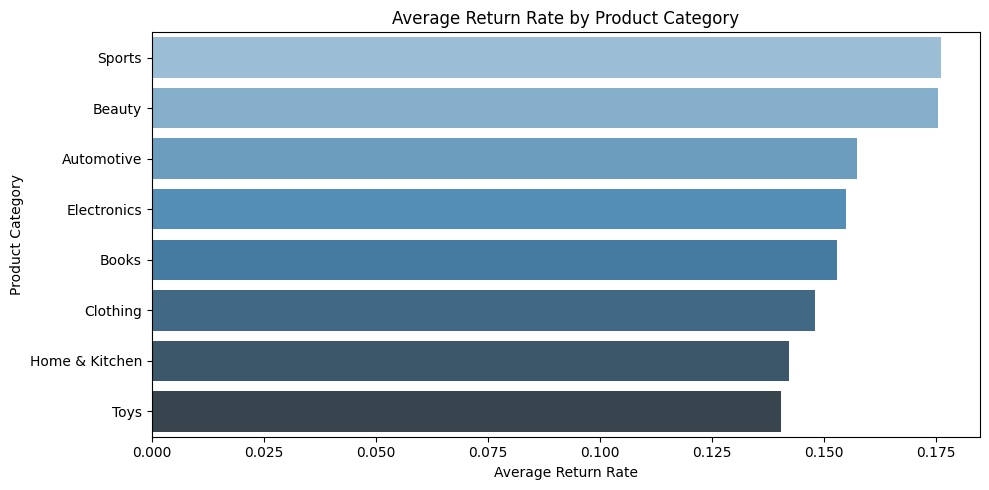

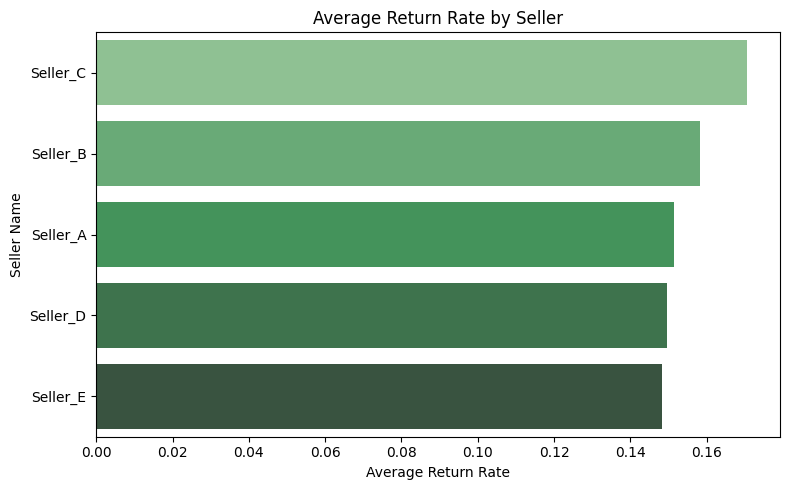

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
category_return = df.groupby('Category')['Return_Rate'].mean().reset_index().sort_values(by='Return_Rate', ascending=False)
seller_return = df.groupby('Seller_Name')['Return_Rate'].mean().reset_index().sort_values(by='Return_Rate', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Return_Rate', y='Category', hue='Category', data=category_return, palette='Blues_d', legend=False)
plt.title('Average Return Rate by Product Category')
plt.xlabel('Average Return Rate')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.barplot(x='Return_Rate', y='Seller_Name', hue='Seller_Name', data=seller_return, palette='Greens_d', legend=False)
plt.title('Average Return Rate by Seller')
plt.xlabel('Average Return Rate')
plt.ylabel('Seller Name')
plt.tight_layout()
plt.show()


### ✅ Step 3: Random Forest for Predicting Return Probability

### 🎯 Objective:
To build a Random Forest model that predicts whether a product is likely to be returned, using engineered and encoded product features. This enhances prediction accuracy over linear models like logistic regression.

### 📌 Actions Performed:
Created a binary target variable (High_Return) where:

1 → Return Rate > 15%

0 → Otherwise

Engineered a new feature:

Name_Length: length of product name as a proxy for naming consistency.

Selected important features: Price, Rating, Category, Seller_Name, Name_Length.

Applied one-hot encoding to convert categorical data into numerical form.

Split the data into 80% training and 20% testing subsets using train_test_split.

Trained a Random Forest Classifier with:

100 trees (n_estimators=100)

class_weight='balanced' to manage class imbalance

Evaluated model performance using:

Accuracy

Confusion Matrix

Classification Report (Precision, Recall, F1-score)

 ### ✅ Outcome:
The Random Forest model achieved improved accuracy (54%) compared to logistic regression.
It better captures non-linear return patterns across different sellers and categories, allowing for more reliable tagging of high-return-risk products.

### 🧾 Code:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('Ecommerce_Product_Sales.csv')
df.columns = df.columns.str.strip().str.replace(" ", "_")
df['High_Return'] = (df['Return_Rate'] > 0.15).astype(int)
df['Name_Length'] = df['Product_Name'].apply(lambda x: len(str(x)))
features = df[['Price', 'Rating', 'Name_Length', 'Category', 'Seller_Name']]
target = df['High_Return']
features_encoded = pd.get_dummies(features, columns=['Category', 'Seller_Name'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.54
Confusion Matrix:
 [[25 17]
 [29 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        42
           1       0.63      0.50      0.56        58

    accuracy                           0.54       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.56      0.54      0.54       100



### ✅ Step 4: Export High-Risk Products
### 🎯 Objective:
To identify and export products that have a high predicted probability of being returned, based on the trained Random Forest model’s predictions. These products are labeled as high-risk and can be flagged for further review by business teams.
### 📌 Actions Performed:
Used the trained Random Forest model to predict return labels on the test dataset.
Calculated return probabilities using predict_proba().
Appended actual label, predicted label, and probability to the test data.
Filtered products where the predicted return risk is high (Predicted == 1).
Exported high-risk products to a CSV file for analysis and integration with Power BI.
### ✅ Outcome:
Generated a list of high-risk products, including:
Actual return label
Predicted label
Probability of return
This CSV can be imported into Power BI for further risk scoring, category analysis, and supplier monitoring.
### 🧾 Code:

In [ ]:
from google.colab import files
y_probs = rf.predict_proba(X_test)[:, 1]
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
results['Return_Probability'] = y_probs
results = results.reset_index(drop=True)
results.to_csv('high_risk_products.csv', index=False)
files.download('high_risk_products.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>